### 1. 데이터 전처리

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

#### 1) CSV 파일 불러오기

In [2]:
train = pd.read_csv("/kaggle/input/kakr-4th-competition/train.csv")
label = train['income']

del train['income']

test = pd.read_csv("/kaggle/input/kakr-4th-competition/test.csv")

In [3]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?


In [4]:
label.head()

0     >50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [5]:
# 라벨 값 인코딩
label = label.map(lambda x: 1 if x == '>50K' else 0)

ID 컬럼은 행의 식별자로 필요 없는 컬럼이므로 삭제하겠습니다. 

In [6]:
del train['id']
del test['id']

In [7]:
tmp_train = train.copy()
tmp_test  = test.copy()

#### 2) 데이터 확인
.head(), .describe(), .info() 등의 함수로 데이터를 확인합니다. 

In [8]:
tmp_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?


In [9]:
tmp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education_num   26049 non-null  int64 
 5   marital_status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital_gain    26049 non-null  int64 
 11  capital_loss    26049 non-null  int64 
 12  hours_per_week  26049 non-null  int64 
 13  native_country  26049 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.8+ MB


In [10]:
tmp_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [11]:
tmp_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


#### 3) 결측치 처리
이전 태진님 강의에서 'workclass', 'occupation', 'native_country' 컬럼에 결측치가 있다는 것을 알 수 있었습니다. <br>
일반적인 결측치와 다르게 '?'로 표현되어있는 값들은 해당 컬럼의 최빈값으로 결측치 처리를 진행하겠습니다. <br>

##### 범주형 변수의 경우 가장 간단하게 최빈값으로 결측치 처리를 할 수 있지만, 다른 컬럼을 필터링해서 결측치 처리를 할 수 있습니다. ex) education_num 등

In [12]:
has_na_columns = ['workclass', 'occupation', 'native_country']

In [13]:
(tmp_train[has_na_columns] == '?').sum()

workclass         1502
occupation        1508
native_country     456
dtype: int64

In [14]:
for c in has_na_columns:
    tmp_train.loc[train[c] == '?', c] = train[c].mode()[0]
    tmp_test.loc[test[c]   == '?', c] = test[c].mode()[0]

In [15]:
(tmp_train[has_na_columns] == '?').sum()

workclass         0
occupation        0
native_country    0
dtype: int64

#### 4) Log 변환
capital_gain 변수와 capital_loss 변수의 분포가 한쪽으로 치우친 형태이므로 Log 변환을 통해 분포의 형태를 조정해주겠습니다.

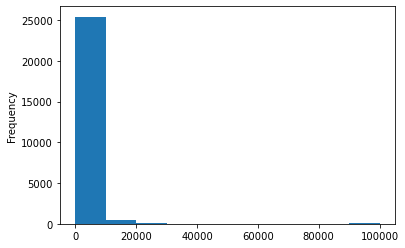

In [16]:
tmp_train['capital_gain'].plot.hist()

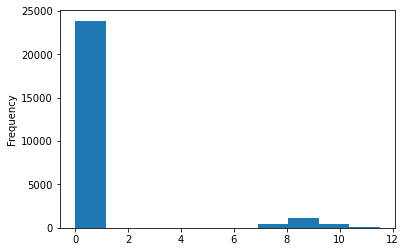

In [17]:
tmp_train['log_capital_gain'] = train['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)
tmp_test['log_capital_gain']  = test['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)

tmp_train['log_capital_gain'].plot.hist()

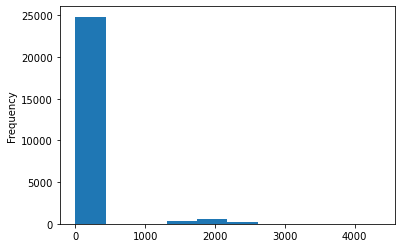

In [18]:
train['capital_loss'].plot.hist()

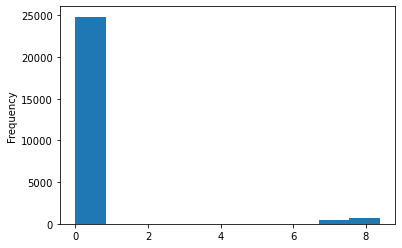

In [19]:
tmp_train['log_capital_loss'] = train['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)
tmp_test['log_capital_loss'] = test['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)

tmp_train['log_capital_loss'].plot.hist()

In [20]:
tmp_train = tmp_train.drop(columns=['capital_loss', 'capital_gain'])
tmp_test  = tmp_test.drop(columns=['capital_loss', 'capital_gain'])

In [21]:
tmp_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,log_capital_gain,log_capital_loss
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,60,United-States,0.0,0.0
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,20,United-States,0.0,0.0
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,16,United-States,0.0,0.0
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,25,United-States,0.0,0.0
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,20,United-States,0.0,0.0


#### 5) 데이터 쪼개기
##### 1. Train, Valid, Test Set
* Train Data : 모델을 학습하는데 사용하는 데이터 (모델이 알고 있는 학습할 데이터, 과거 데이터)
* Valid Data : 학습한 모델의 성능을 검증하는 데이터 (모델이 모르는 학습하지 않을 데이터, 모델 검증에 사용하는 데이터, 과거 데이터)
* Test Data : 학습한 모델로 예측할 데이터 (모델이 모르는 예측할 데이터, 미래 데이터)

##### 데이터 쪼개기, Train -> (Train, Valid)
- train_test_split 파라미터 
    - test_size  (float): Valid(test)의 크기의 비율을 지정
    - random_state (int): 데이터를 쪼갤 때 내부적으로 사용되는 난수 값 (해당 값을 지정하지 않으면 매번 달라집니다.)
    - shuffle     (bool): 데이터를 쪼갤 때 섞을지 유무
    - stratify   (array): Stratify란, 쪼개기 이전의 클래스 비율을 쪼개고 나서도 유지하기 위해 설정해야하는 값입니다. 클래스 라벨을 넣어주면 됩니다.
        - ex) 원본 Train 데이터의 클래스 비율이 (7:3) 이었다면, 쪼개어진 Train, Valid(test) 데이터의 클래스 비율도 (7:3)이 됩니다. 당연히 분류 데이터에서만 사용할 수 있습니다.

In [22]:
from sklearn.model_selection import train_test_split

tmp_train, tmp_valid, y_train, y_valid = train_test_split(tmp_train, label, 
                                                          test_size=0.3,
                                                          random_state=2020,
                                                          shuffle=True,
                                                          stratify=label)

In [23]:
# 인덱스 초기화
tmp_train = tmp_train.reset_index(drop=True)
tmp_valid = tmp_valid.reset_index(drop=True)
tmp_test  = tmp_test.reset_index(drop=True)

#### 6) 스케일링
Scikit-learn 라이브러리에 있는 Standard Scaler를 사용해서 수치형 변수들의 표준화를 진행하겠습니다.

In [24]:
tmp_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'hours_per_week', 'native_country', 'log_capital_gain',
       'log_capital_loss'],
      dtype='object')

c를 가지고 list 만들것 묶은 것에서 t=='O'

In [25]:
cat_columns = [c for c, t in zip(tmp_train.dtypes.index, tmp_train.dtypes) if t == 'O'] 
num_columns = [c for c in tmp_train.columns if c not in cat_columns]

print('범주형 변수: \n{}\n\n 수치형 변수: \n{}\n'.format(cat_columns, num_columns))

범주형 변수: 
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

 수치형 변수: 
['age', 'fnlwgt', 'education_num', 'hours_per_week', 'log_capital_gain', 'log_capital_loss']



In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tmp_train[num_columns] = scaler.fit_transform(tmp_train[num_columns])
tmp_valid[num_columns] = scaler.transform(tmp_valid[num_columns])
tmp_test[num_columns]  = scaler.transform(tmp_test[num_columns])

In [27]:
tmp_train.describe()

,age,fnlwgt,education_num,hours_per_week,log_capital_gain,log_capital_loss
count,1.823400e+04,1.823400e+04,1.823400e+04,1.823400e+04,1.823400e+04,1.823400e+04
mean,-1.353712e-16,-3.069949e-17,2.664255e-16,4.398370e-16,-1.446012e-15,3.109830e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-1.575121e+00,-1.661651e+00,-3.549168e+00,-3.175259e+00,-3.032959e-01,-2.209828e-01
25%,-8.441270e-01,-6.773644e-01,-4.287495e-01,-3.725226e-02,-3.032959e-01,-2.209828e-01
50%,-1.131329e-01,-1.055421e-01,-3.869719e-02,-3.725226e-02,-3.032959e-01,-2.209828e-01
75%,6.909606e-01,4.466872e-01,1.131460e+00,3.650563e-01,-3.032959e-01,-2.209828e-01
max,3.761136e+00,1.188097e+01,2.301616e+00,4.709988e+00,4.326449e+00,5.071417e+00


In [28]:
tmp_valid.describe()

,age,fnlwgt,education_num,hours_per_week,log_capital_gain,log_capital_loss
count,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000,7815.000000
mean,0.005257,-0.011081,-0.014091,-0.005325,-0.014643,0.006928
std,0.997915,0.984603,1.004929,0.982061,0.975637,1.014457
min,-1.575121,-1.614138,-3.549168,-3.175259,-0.303296,-0.220983
25%,-0.771028,-0.686258,-0.428749,-0.037252,-0.303296,-0.220983
50%,-0.113133,-0.119802,-0.038697,-0.037252,-0.303296,-0.220983
75%,0.690961,0.431563,0.741407,0.365056,-0.303296,-0.220983
max,3.761136,12.155926,2.301616,4.709988,4.326449,4.980164


In [29]:
tmp_test.describe()

,age,fnlwgt,education_num,hours_per_week,log_capital_gain,log_capital_loss
count,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000
mean,0.006114,-0.028036,-0.019231,-0.003879,-0.021865,-0.007044
std,0.988042,0.975533,1.011418,0.988914,0.964069,0.986211
min,-1.575121,-1.675592,-3.549168,-3.175259,-0.303296,-0.220983
25%,-0.771028,-0.696584,-0.428749,-0.037252,-0.303296,-0.220983
50%,-0.113133,-0.129412,-0.038697,-0.037252,-0.303296,-0.220983
75%,0.690961,0.424525,0.741407,0.365056,-0.303296,-0.220983
max,3.761136,8.782713,2.301616,4.709988,4.326449,5.071417


#### 6) 인코딩
범주형 변수를 수치형 변수로 인코딩 하겠습니다. 범주형 변수에는 Onehot Encoding을 적용합니다.

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

tmp_all = pd.concat([tmp_train, tmp_valid, tmp_test])

ohe = OneHotEncoder(sparse=False)
ohe.fit(tmp_all[cat_columns])

OneHotEncoder(sparse=False)

In [31]:
tmp_all[cat_columns]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
1,Private,Some-college,Never-married,Transport-moving,Unmarried,Black,Female,United-States
2,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
4,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,White,Male,United-States
...,...,...,...,...,...,...,...,...
6507,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States
6508,Self-emp-inc,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,United-States
6509,Private,5th-6th,Married-civ-spouse,Other-service,Husband,White,Male,Mexico
6510,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


In [32]:
ohe_columns = list()
for lst in ohe.categories_:
    ohe_columns += lst.tolist()

In [33]:
ohe.transform(tmp_train[cat_columns]).shape

(18234, 99)

In [34]:
new_train_cat = pd.DataFrame(ohe.transform(tmp_train[cat_columns]), columns=ohe_columns)
new_valid_cat = pd.DataFrame(ohe.transform(tmp_valid[cat_columns]), columns=ohe_columns)
new_test_cat  = pd.DataFrame(ohe.transform(tmp_test[cat_columns]), columns=ohe_columns)

In [35]:
new_train_cat.head()

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
cat_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [37]:
tmp_train = pd.concat([tmp_train, new_train_cat], axis=1)
tmp_valid = pd.concat([tmp_valid, new_valid_cat], axis=1)
tmp_test = pd.concat([tmp_test, new_test_cat], axis=1)

# 기존 범주형 변수 제거
tmp_train = tmp_train.drop(columns=cat_columns)
tmp_valid = tmp_valid.drop(columns=cat_columns)
tmp_test = tmp_test.drop(columns=cat_columns)

In [38]:
tmp_train.head()

,age,fnlwgt,education_num,hours_per_week,log_capital_gain,log_capital_loss,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.325464,2.763660,-0.038697,-0.198176,3.038414,-0.220983,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.252364,-0.527452,-0.038697,-0.037252,-0.303296,-0.220983,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.106165,-0.130971,-0.038697,-0.037252,-0.303296,-0.220983,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.697928,0.321262,-0.038697,0.365056,-0.303296,-0.220983,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.282723,-0.447108,-0.428749,-0.037252,-0.303296,-0.220983,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
tmp_y_train = y_train
tmp_y_valid = y_valid

### 2. Scikit-Learn 분류 모델 사용해보기
Scikit-Learn의 기본 분류 모델을 사용해보겠습니다. <br>
각 모델의 평가 메트릭은 대회 평가 메트릭인 f1_score를 사용합니다.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score

#### 1) 로지스틱 회귀 모델

In [41]:
lr = LogisticRegression()

lr.fit(tmp_train, tmp_y_train)

y_pred = lr.predict(tmp_valid)

print(f"Logistic Regression F1 Score: {f1_score(tmp_y_valid, y_pred, average='micro')}")

Logistic Regression F1 Score: 0.8474728087012157


#### 2) 서포트 벡터 머신(rbf 커널)

In [42]:
SVC?

In [43]:
svc = SVC()

svc.fit(tmp_train, tmp_y_train)

y_pred = svc.predict(tmp_valid)

print(f"Support Vector Machine F1 Score: {f1_score(tmp_y_valid, y_pred, average='micro')}")

Support Vector Machine F1 Score: 0.8551503518873961


#### 3) 랜덤 포레스트

In [44]:
rf = RandomForestClassifier()

rf.fit(tmp_train, tmp_y_train)

y_pred = rf.predict(tmp_valid)

print(f"RandomForest F1 Score: {f1_score(tmp_y_valid, y_pred, average='micro')}")

RandomForest F1 Score: 0.8532309660908509


#### 4) XGBoost

In [45]:
xgb = XGBClassifier(tree_method='gpu_hist')

xgb.fit(tmp_train, tmp_y_train)

y_pred = xgb.predict(tmp_valid)

print(f"XGBoost F1 Score: {f1_score(tmp_y_valid, y_pred, average='micro')}")

XGBoost F1 Score: 0.8678182981445938


#### 5) LightGBM

In [46]:
lgb = LGBMClassifier(tree_method='gpu_hist')

lgb.fit(tmp_train, tmp_y_train)

y_pred = lgb.predict(tmp_valid)

print(f"LightGBM F1 Score: {f1_score(tmp_y_valid, y_pred, average='micro')}")

LightGBM F1 Score: 0.8689699296225208


### 3. k-Fold Cross Validation
먼저 1. 에서 정리한 전처리 프로세스를 하나의 함수로 만듭니다.

In [47]:
def preprocess(x_train, x_valid, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    tmp_x_test  = x_test.copy()
    
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_valid = tmp_x_valid.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)
    
    for c in has_na_columns:
        tmp_x_train.loc[tmp_x_train[c] == '?', c] = tmp_x_train[c].mode()[0]
        tmp_x_valid.loc[tmp_x_valid[c] == '?', c] = tmp_x_valid[c].mode()[0]
        tmp_x_test.loc[tmp_x_test[c]   == '?', c] = tmp_x_test[c].mode()[0]
    
    tmp_x_train['log_capital_loss'] = tmp_x_train['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)
    tmp_x_valid['log_capital_loss'] = tmp_x_valid['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)
    tmp_x_test['log_capital_loss'] = tmp_x_test['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)
    
    tmp_x_train['log_capital_gain'] = tmp_x_train['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)
    tmp_x_valid['log_capital_gain'] = tmp_x_valid['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)
    tmp_x_test['log_capital_gain'] = tmp_x_test['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)
    
    tmp_x_train = tmp_x_train.drop(columns=['capital_loss', 'capital_gain'])
    tmp_x_valid = tmp_x_valid.drop(columns=['capital_loss', 'capital_gain'])
    tmp_x_test  = tmp_x_test.drop(columns=['capital_loss', 'capital_gain'])
    
    scaler = StandardScaler()
    tmp_x_train[num_columns] = scaler.fit_transform(tmp_x_train[num_columns])
    tmp_x_valid[num_columns] = scaler.transform(tmp_x_valid[num_columns])
    tmp_x_test[num_columns]  = scaler.transform(tmp_x_test[num_columns])
    
    tmp_all = pd.concat([tmp_x_train, tmp_x_valid, tmp_x_test])

    ohe = OneHotEncoder(sparse=False)
    ohe.fit(tmp_all[cat_columns])
    
    ohe_columns = list()
    for lst in ohe.categories_:
        ohe_columns += lst.tolist()
    
    tmp_train_cat = pd.DataFrame(ohe.transform(tmp_x_train[cat_columns]), columns=ohe_columns)
    tmp_valid_cat = pd.DataFrame(ohe.transform(tmp_x_valid[cat_columns]), columns=ohe_columns)
    tmp_test_cat  = pd.DataFrame(ohe.transform(tmp_x_test[cat_columns]), columns=ohe_columns)
    
    tmp_x_train = pd.concat([tmp_x_train, tmp_train_cat], axis=1)
    tmp_x_valid = pd.concat([tmp_x_valid, tmp_valid_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, tmp_test_cat], axis=1)

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_valid = tmp_x_valid.drop(columns=cat_columns)
    tmp_x_test = tmp_x_test.drop(columns=cat_columns)
    
    return tmp_x_train.values, tmp_x_valid.values, tmp_x_test.values

In [48]:
def xgb_f1(y, t, threshold=0.5):
    t = t.get_label()
    y_bin = (y > threshold).astype(int) 
    return 'f1',f1_score(t, y_bin, average='micro')

In [49]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2020)

In [50]:
def xgb_f1(y, t, threshold=0.5):
    t = t.get_label()
    y_bin = (y > threshold).astype(int) # works for both type(y) == <class 'numpy.ndarray'> and type(y) == <class 'pandas.core.series.Series'>
    return 'f1',f1_score(t,y_bin)

In [51]:
val_scores = list()
oof_pred = np.zeros((test.shape[0],))

for i, (trn_idx, val_idx) in enumerate(skf.split(train, label)):
    x_train, y_train = train.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = train.iloc[val_idx, :], label[val_idx]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, test)
    
    # 모델 정의
    clf = XGBClassifier(tree_method='gpu_hist')
    
    # 모델 학습
    clf.fit(x_train, y_train,
            eval_set = [[x_valid, y_valid]], 
            eval_metric = xgb_f1,       
            early_stopping_rounds = 100,
            verbose = 100,  )

    # 훈련, 검증 데이터 Log Loss 확인
    trn_f1_score = f1_score(y_train, clf.predict(x_train), average='micro')
    val_f1_score = f1_score(y_valid, clf.predict(x_valid), average='micro')
    print('{} Fold, train f1_score : {:.4f}4, validation f1_score : {:.4f}\n'.format(i, trn_f1_score, val_f1_score))
    
    val_scores.append(val_f1_score)
    

# 교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

[0]	validation_0-error:0.14530	validation_0-f1:0.42848
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.13109	validation_0-f1:0.68083
0 Fold, train f1_score : 0.85894, validation f1_score : 0.8574

[0]	validation_0-error:0.14741	validation_0-f1:0.37876
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.12841	validation_0-f1:0.66051
1 Fold, train f1_score : 0.85584, validation f1_score : 0.8562

[0]	validation_0-error:0.15010	validation_0-f1:0.42590
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.13378	validation_0-f1:0.67356
2 Fold, train f1_score : 0.85724, validation f1_score : 0.8516

[0]	val

### 4. OOF(Out-Of-Fold) 앙상블
k-Fold를 활용해서 모델 검증 및 각 폴드의 결과를 앙상블하는 OOF 앙상블 입니다.

In [52]:
np.zeros(test.shape[0], )

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
val_scores = list()
oof_pred = np.zeros((test.shape[0], ))

for i, (trn_idx, val_idx) in enumerate(skf.split(train, label)):
    x_train, y_train = train.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = train.iloc[val_idx, :], label[val_idx]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, test)
    
    # 모델 정의
    clf = XGBClassifier(tree_method='gpu_hist')
    
    # 모델 학습
    clf.fit(x_train, y_train,
            eval_set = [[x_valid, y_valid]], 
            eval_metric = xgb_f1,        
            early_stopping_rounds = 100,
            verbose = 100,  )

    # 훈련, 검증 데이터 F1 Score 확인
    trn_f1_score = f1_score(y_train, clf.predict(x_train), average='micro')
    val_f1_score = f1_score(y_valid, clf.predict(x_valid), average='micro')
    print('{} Fold, train f1_score : {:.4f}4, validation f1_score : {:.4f}\n'.format(i, trn_f1_score, val_f1_score))
    
    val_scores.append(val_f1_score)
    
    oof_pred += clf.predict_proba(x_test)[:, 1] / n_splits
    

# 교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

[0]	validation_0-error:0.14530	validation_0-f1:0.42848
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.13109	validation_0-f1:0.68083
0 Fold, train f1_score : 0.85894, validation f1_score : 0.8574

[0]	validation_0-error:0.14741	validation_0-f1:0.37876
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.12841	validation_0-f1:0.66051
1 Fold, train f1_score : 0.85584, validation f1_score : 0.8562

[0]	validation_0-error:0.15010	validation_0-f1:0.42590
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.13378	validation_0-f1:0.67356
2 Fold, train f1_score : 0.85724, validation f1_score : 0.8516

[0]	val

In [54]:
(oof_pred >0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

### 5. Stacking 앙상블
2 stage 앙상블인 Stacking 앙상블 입니다. Stacking 앙상블은 수십개의 1 stage 모델의 결과를 모아 2 stage 모델로 학습 후 결과를 내는 앙상블 방식입니다.

#### 1) 1 stage 결과 모으기
Stacking 앙상블을 진행할 1 stage 모델의 결과(train, test)를 모읍니다. 

In [55]:
val_scores = list()

new_x_train_list = [np.zeros((train.shape[0], 1)) for _ in range(4)]
new_x_test_list  = [np.zeros((test.shape[0], 1)) for _ in range(4)]

for i, (trn_idx, val_idx) in enumerate(skf.split(train, label)):
    print(f"Fold {i} Start")
    x_train, y_train = train.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = train.iloc[val_idx, :], label[val_idx]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, test)
    
    # 모델 정의
    clfs = [LogisticRegression(), 
            RandomForestClassifier(), 
            XGBClassifier(tree_method='gpu_hist'), 
            LGBMClassifier(tree_method='gpu_hist')]
    
    for model_idx, clf in enumerate(clfs):
        clf.fit(x_train, y_train)
        
        new_x_train_list[model_idx][val_idx, :] = clf.predict_proba(x_valid)[:, 1].reshape(-1, 1)
        new_x_test_list[model_idx][:] += clf.predict_proba(x_test)[:, 1].reshape(-1, 1) / n_splits

Fold 0 Start
Fold 1 Start
Fold 2 Start
Fold 3 Start
Fold 4 Start


In [56]:
new_x_train_list

[array([[0.40378779],
        [0.00085303],
        [0.00188292],
        ...,
        [0.16104723],
        [0.00242701],
        [0.00375975]]),
 array([[0.37],
        [0.  ],
        [0.  ],
        ...,
        [0.22],
        [0.02],
        [0.  ]]),
 array([[4.54346806e-01],
        [1.63364821e-04],
        [1.38795775e-04],
        ...,
        [3.81566994e-02],
        [4.90012253e-03],
        [1.68046769e-04]]),
 array([[4.31411770e-01],
        [2.26804236e-03],
        [3.93953680e-04],
        ...,
        [1.64828301e-01],
        [4.23512656e-03],
        [3.65175015e-04]])]

In [57]:
new_x_test_list

[array([[0.00823119],
        [0.49781228],
        [0.00315219],
        ...,
        [0.02010608],
        [0.21492675],
        [0.0078171 ]]),
 array([[0.   ],
        [0.512],
        [0.   ],
        ...,
        [0.   ],
        [0.346],
        [0.002]]),
 array([[3.04820507e-03],
        [5.13972826e-01],
        [5.62181694e-05],
        ...,
        [9.68824374e-03],
        [2.01625150e-01],
        [8.45001510e-03]]),
 array([[4.61881749e-03],
        [5.16552143e-01],
        [3.19520376e-04],
        ...,
        [2.33144000e-02],
        [2.03639978e-01],
        [8.27652645e-03]])]

In [58]:
new_train = pd.DataFrame(np.concatenate(new_x_train_list, axis=1), columns=None)

new_label = label

new_test = pd.DataFrame(np.concatenate(new_x_test_list, axis=1), columns=None)

new_train.shape, new_label.shape, new_test.shape

((26049, 4), (26049,), (6512, 4))

#### 2) 2 Stage Meta Model 학습
new_train, new_test에 들어있는 변수는 모두 수치형 변수이므로 Standard Scaling만 진행하겠습니다.<br>
새로 생성한 데이터 new_train, new_test 데이터를 가지고 2 Stage Meta Model을 학습하고 결과를 만듭니다.

In [59]:
val_scores = list()
oof_pred = np.zeros((test.shape[0], ))

for i, (trn_idx, val_idx) in enumerate(skf.split(new_train, new_label)):
    x_train, y_train = new_train.iloc[trn_idx, :], new_label[trn_idx]
    x_valid, y_valid = new_train.iloc[val_idx, :], new_label[val_idx]
    
    # 전처리
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_valid = scaler.transform(x_valid)
    x_test  = scaler.transform(new_test)
    
    # 모델 정의
    clf = XGBClassifier(tree_method='gpu_hist')
    
    # 모델 학습
    clf.fit(x_train, y_train,
            eval_set = [[x_valid, y_valid]], 
            eval_metric = xgb_f1,        
            early_stopping_rounds = 100,
            verbose = 100,  )

    # 훈련, 검증 데이터 F1 Score 확인
    trn_f1_score = f1_score(y_train, clf.predict(x_train), average='micro')
    val_f1_score = f1_score(y_valid, clf.predict(x_valid), average='micro')
    print('{} Fold, train f1_score : {:.4f}4, validation f1_score : {:.4f}\n'.format(i, trn_f1_score, val_f1_score))
    
    val_scores.append(val_f1_score)
    
    oof_pred += clf.predict_proba(x_test)[:, 1] / n_splits
    

# 교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

[0]	validation_0-error:0.13263	validation_0-f1:0.45488
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.13205	validation_0-f1:0.65087
0 Fold, train f1_score : 0.87384, validation f1_score : 0.8674

[0]	validation_0-error:0.13301	validation_0-f1:0.40929
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.13532	validation_0-f1:0.63473
1 Fold, train f1_score : 0.87604, validation f1_score : 0.8670

[0]	validation_0-error:0.13263	validation_0-f1:0.42760
Multiple eval metrics have been passed: 'validation_0-f1' will be used for early stopping.

Will train until validation_0-f1 hasn't improved in 100 rounds.
[99]	validation_0-error:0.13858	validation_0-f1:0.64607
2 Fold, train f1_score : 0.87504, validation f1_score : 0.8674

[0]	val

### 6. 결과 만들기

In [60]:
submit = pd.read_csv("/kaggle/input/kakr-4th-competition/sample_submission.csv")

In [61]:
submit.loc[:, 'prediction'] = (oof_pred > 0.5).astype(int)

In [62]:
submit.head()

,id,prediction
0,0,0
1,1,1
2,2,0
3,3,1
4,4,1


In [63]:
submit.to_csv('submission.csv', index=False)